<a href="https://colab.research.google.com/github/MarynaZinchenko888/python_for_ds_tasks/blob/main/Zinchenko_M_HW_16_2_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D1%83%D0%B2%D0%B0%D0%BD%D0%BD%D1%8F_%D0%BA%D1%80%D0%B5%D0%B4%D0%B8%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%80%D0%B8%D0%B7%D0%B8%D0%BA%D1%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Прогнозування кредитного ризику

## Мета завдання
Застосувати знання з лекції для побудови моделі логістичної регресії, що прогнозує ймовірність дефолту за кредитом, іншими словами, що людина не поверне кредит. Ви пройдете весь цикл: від дослідницького аналізу до оцінки якості класифікаційної моделі.

## Опис датасету
**Credit Risk Dataset** містить інформацію про 32,000+ позичальників з такими параметрами:
- **person_age**: Вік позичальника
- **person_income**: Річний дохід
- **person_home_ownership**: Тип володіння житлом
- **person_emp_length**: Стаж роботи (в роках)
- **loan_intent**: Мета кредиту
- **loan_grade**: Кредитний рейтинг (A - кращий, F - гірший)
- **loan_amnt**: Сума кредиту
- **loan_int_rate**: Процентна ставка
- **loan_status**: Статус кредиту (0 = сплачено, 1 = дефолт) - **цільова змінна**
- **loan_percent_income**: Відношення кредиту до доходу
- **cb_person_default_on_file**: Історія дефолтів (Y/N)
- **cb_person_cred_hist_length**: Довжина кредитної історії

---

## Завдання 1: Завантаження та перший огляд даних (1 бал)

**Що потрібно зробити:**
1. Завантажте дані з файлу `credit_risk_dataset.csv`
2. Виведіть розмір датасету
3. Покажіть перші 5 рядків
4. Виведіть загальну інформацію про дані (кількість записів, типи колонок)
5. Перевірте розподіл цільової змінної (відсотк даних для кожного класу)

Дайте висновок, це задача збалансованої чи незбалансованої класифікації.


In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [66]:
# 1.1 Завантаження даних
df = pd.read_csv("credit_risk_dataset.csv")

In [67]:
# 1.2 Розмір датасету
df.shape

(32581, 12)

In [68]:
# 1.3 Перші 5 рядків
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [69]:
# 1.4 Загальна інформація про дані
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [70]:
# 1.5 Розподіл цільової змінної
target_counts = df['loan_status'].value_counts()
target_percent = df['loan_status'].value_counts(normalize=True) * 100
print("\nРозподіл цільової змінної:")
print(pd.concat([target_counts, target_percent], axis=1, keys=['Count', 'Percent']))


Розподіл цільової змінної:
             Count    Percent
loan_status                  
0            25473  78.183604
1             7108  21.816396


In [71]:
# Висновок про баланс класів
if target_percent.min() < 30:
    print("\nВисновок: класи незбалансовані, потрібно враховувати при моделюванні.")
else:
    print("\nВисновок: класи приблизно збалансовані.")


Висновок: класи незбалансовані, потрібно враховувати при моделюванні.



---

## Завдання 2: Дослідницький аналіз даних (EDA) (4 бали)

**Що потрібно зробити:**
1. Обчисліть відсоток пропущених значень в колонках. За наявності пропущених значень - заповніть їх медіаною для числових колонок і найбільш частим значеннмя для категоріальних.
2. Проаналізуйте розподіл числових змінних.
3. Знайдіть та обробіть викиди в колонці person_income з допомогою [Interquartile range](https://uk.wikipedia.org/wiki/%D0%9C%D1%96%D0%B6%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D0%BB%D1%8C%D0%BD%D0%B8%D0%B9_%D1%80%D0%BE%D0%B7%D0%BC%D0%B0%D1%85).
4. Проаналізуйте категоріальні змінні відносно цільової та частоту зустрічання різних значень в них.
5. Візуалізуйте взаємозв'язок ознак з цільовою змінною.


In [72]:
# 2.1 Відсоток пропущених значень
missing_percent = df.isnull().mean() * 100
print("Відсоток пропусків у колонках:")
print(missing_percent)

Відсоток пропусків у колонках:
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


In [73]:
# Заповнення пропусків
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-306469965.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-306469965.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

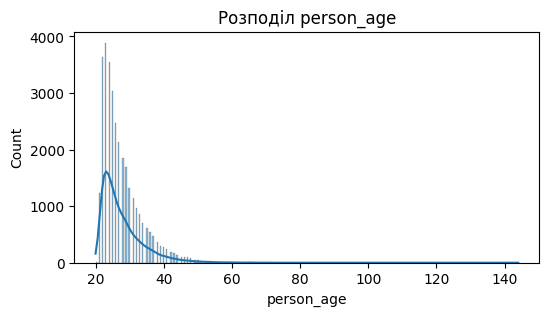

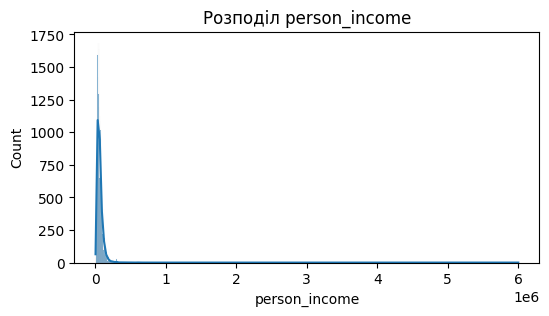

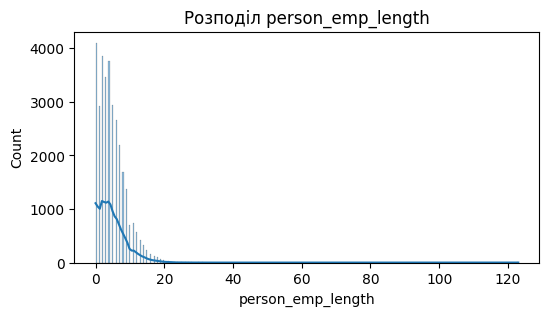

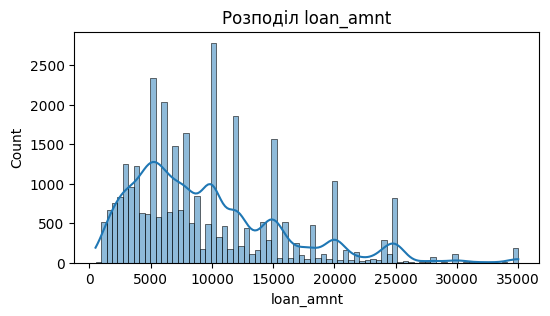

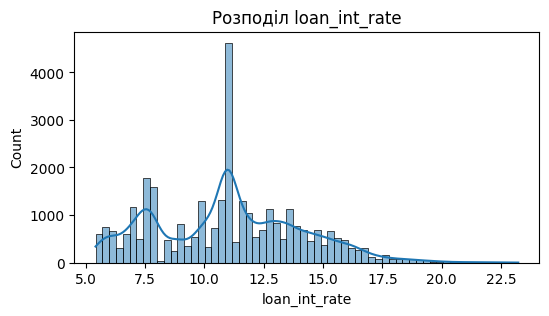

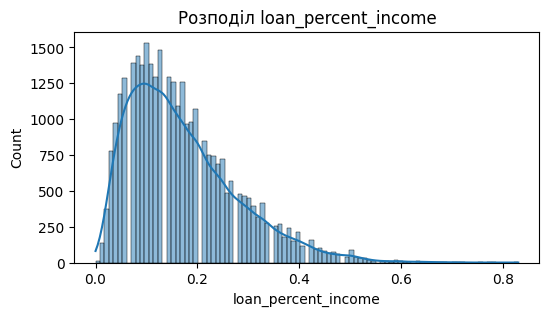

In [74]:
# 2.2 Аналіз розподілу числових змінних
num_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']

# Гістограми
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Розподіл {col}')
    plt.show()

In [75]:
# 2.3 Обробка викидів у person_income за IQR
Q1 = df['person_income'].quantile(0.25)
Q3 = df['person_income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Викиди замінюємо на межі
df['person_income'] = np.where(df['person_income'] < lower_bound, lower_bound, df['person_income'])
df['person_income'] = np.where(df['person_income'] > upper_bound, upper_bound, df['person_income'])

print(df['person_income'])
print(df['person_income'])

0         59000.0
1          9600.0
2          9600.0
3         65500.0
4         54400.0
           ...   
32576     53000.0
32577    120000.0
32578     76000.0
32579    140250.0
32580     42000.0
Name: person_income, Length: 32581, dtype: float64
0         59000.0
1          9600.0
2          9600.0
3         65500.0
4         54400.0
           ...   
32576     53000.0
32577    120000.0
32578     76000.0
32579    140250.0
32580     42000.0
Name: person_income, Length: 32581, dtype: float64



Колонка: person_home_ownership
person_home_ownership
RENT        50.477272
MORTGAGE    41.263313
OWN          7.931003
OTHER        0.328412
Name: proportion, dtype: float64


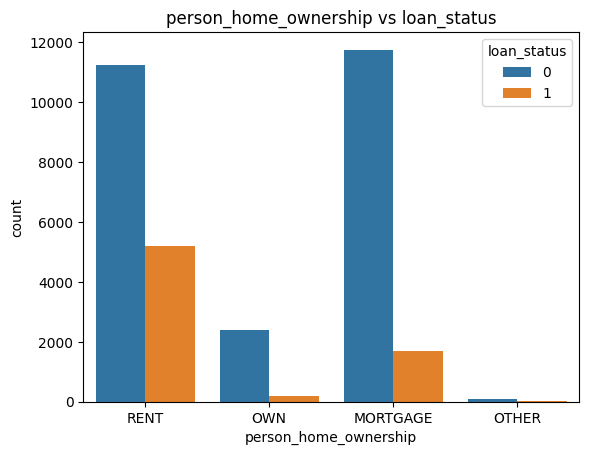


Колонка: loan_intent
loan_intent
EDUCATION            19.806022
MEDICAL              18.633559
VENTURE              17.553175
PERSONAL             16.945459
DEBTCONSOLIDATION    15.997053
HOMEIMPROVEMENT      11.064731
Name: proportion, dtype: float64


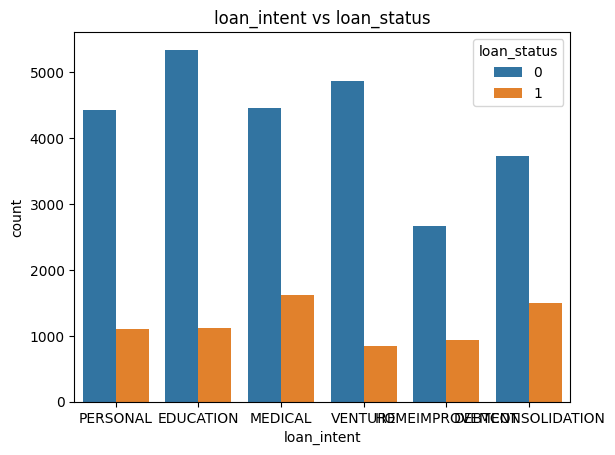


Колонка: loan_grade
loan_grade
A    33.077561
B    32.076977
C    19.821368
D    11.129186
E     2.958780
F     0.739695
G     0.196434
Name: proportion, dtype: float64


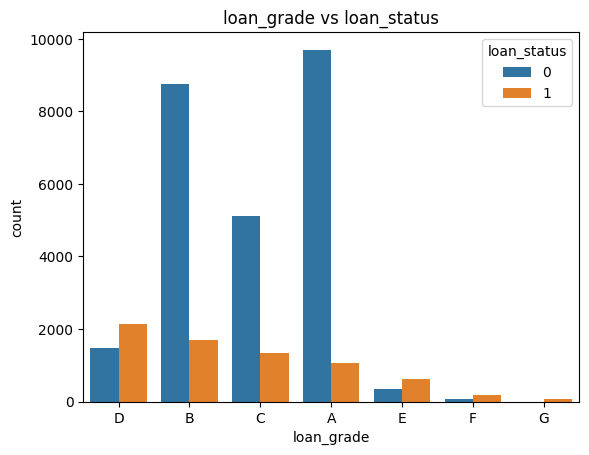


Колонка: cb_person_default_on_file
cb_person_default_on_file
N    82.367024
Y    17.632976
Name: proportion, dtype: float64


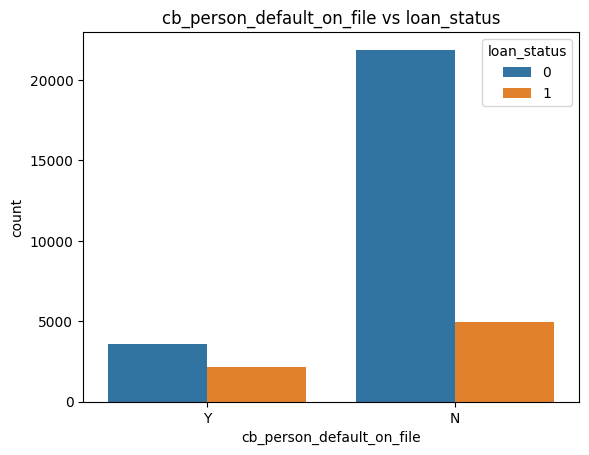

In [76]:
# 2.4 Аналіз категоріальних змінних
cat_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

for col in cat_cols:
    print(f"\nКолонка: {col}")
    print(df[col].value_counts(normalize=True) * 100)  # частота зустрічання
    sns.countplot(x=col, hue='loan_status', data=df)
    plt.title(f'{col} vs loan_status')
    plt.show()

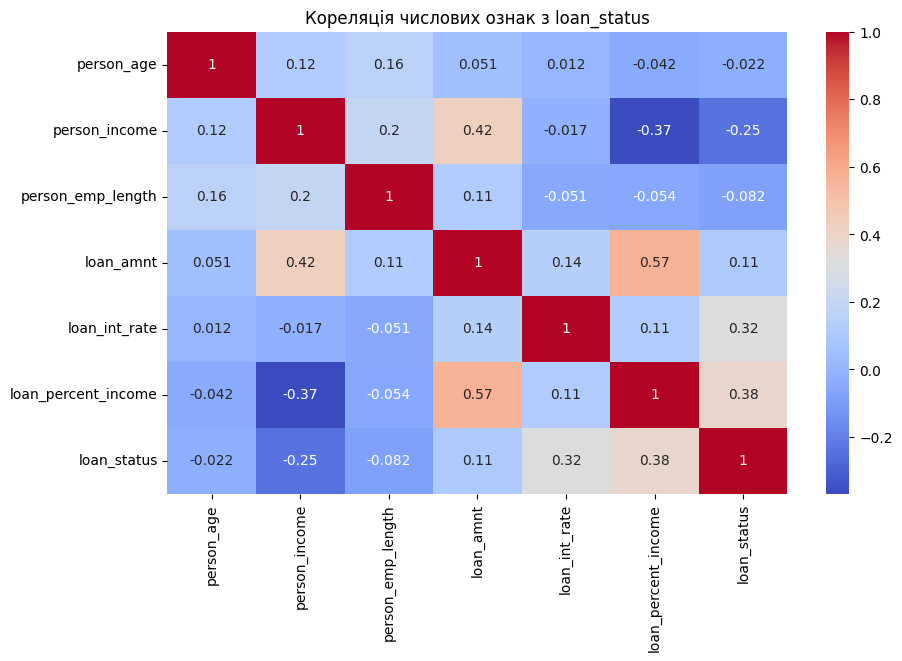

In [77]:
# 2.5 Візуалізація взаємозв’язку ознак з цільовою
# Кореляційна матриця для числових змінних
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols + ['loan_status']].corr(), annot=True, cmap='coolwarm')
plt.title('Кореляція числових ознак з loan_status')
plt.show()

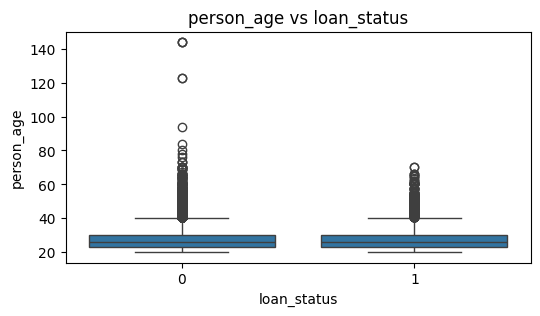

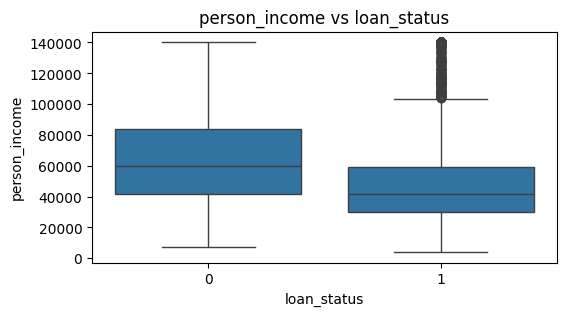

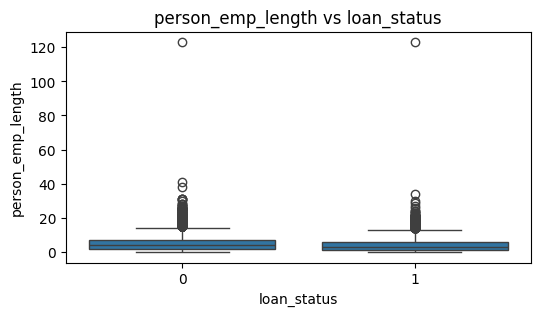

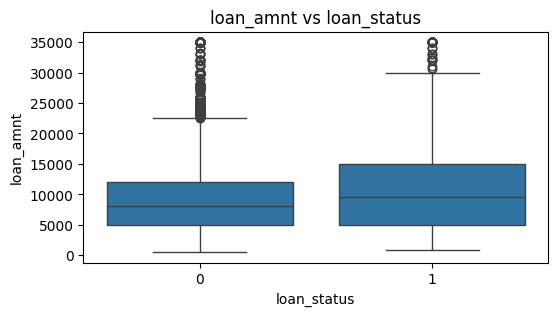

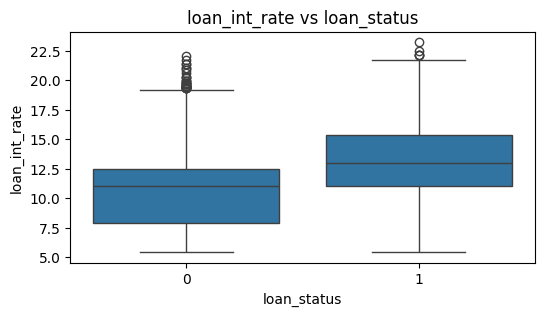

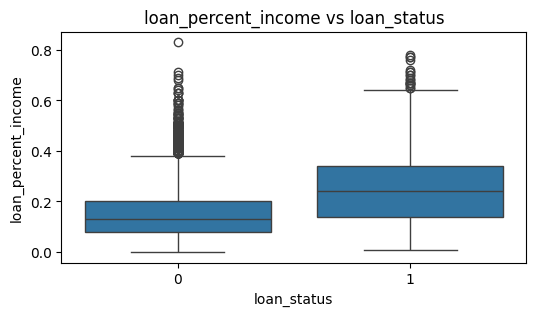

In [78]:
# Boxplot числових ознак vs цільова змінна
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='loan_status', y=col, data=df)
    plt.title(f'{col} vs loan_status')
    plt.show()


---

## Завдання 3: Аналіз кореляцій та Feature Engineering (3 бали)

**Що потрібно зробити:**
1. Побудуйте матрицю кореляцій для числових змінних.
2. Закодуйте категоріальні змінні.
3. Виберіть фінальний набір ознак, можна лишити всі, якщо ви вважаєте, що це - доцільно.



In [79]:
# Список числових колонок
num_cols = ['person_age', 'person_income', 'person_emp_length',
            'loan_amnt', 'loan_int_rate', 'loan_percent_income']

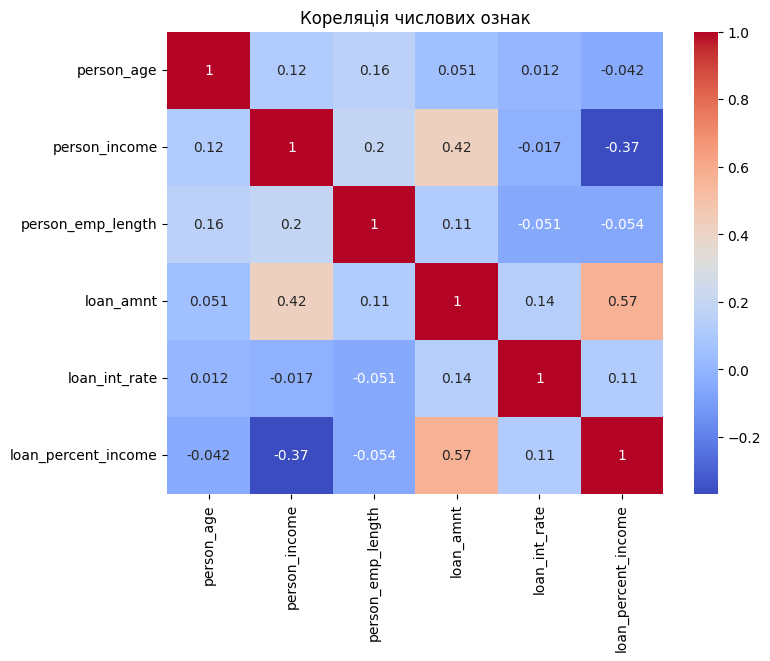

In [80]:
# 3.1 Матриця кореляцій для числових змінних
plt.figure(figsize=(8,6))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Кореляція числових ознак')
plt.show()

In [81]:
# 3.2 Кодування категоріальних змінних
# Категоріальні ознаки
cat_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# One-hot encoding з drop_first=True, щоб уникнути даммі-ловушки
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [82]:
# 3.3 Вибір фінального набору ознак
print("Фінальні ознаки для моделі:")
print(df_encoded.columns.drop('loan_status'))

Фінальні ознаки для моделі:
Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_B',
       'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F',
       'loan_grade_G', 'cb_person_default_on_file_Y'],
      dtype='object')



---

## Завдання 4: Підготовка даних та навчання моделі (3 бали)

**Що потрібно зробити:**
1. Розділіть дані на X та y
2. Поділіть на навчальну та тестову вибірки
3. Застосуйте масштабування
4. Навчіть модель логістичної регресії
5. Зробіть прогнози на тренувальній та тестовій вибірках.



In [83]:
# 4.1 # Ознаки (усі крім цільової)
X = df_encoded.drop('loan_status', axis=1)
# Цільова змінна
y = df_encoded['loan_status']

In [84]:
# 4.2 Поділ на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% на тест
    random_state=42,     # для відтворюваності
    stratify=y           # зберегти баланс класів
)

In [85]:
# 4.3 Масштабування числових змінних
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
# 4.4 Навчання логістичної регресії
model = LogisticRegression(max_iter=1000, class_weight='balanced')

model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [87]:
# 4.5 Прогнози
# Прогнози класів
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Ймовірності для ROC-AUC
y_train_proba = model.predict_proba(X_train_scaled)[:, 1]
y_test_proba = model.predict_proba(X_test_scaled)[:, 1]

print("Приклади прогнозів (Train):", y_train_pred[:10])
print("Приклади прогнозів (Test):", y_test_pred[:10])

Приклади прогнозів (Train): [0 0 1 0 0 0 0 1 0 0]
Приклади прогнозів (Test): [0 0 0 0 0 0 0 0 0 1]



---

## Завдання 5: Оцінка якості моделі (4 бали)

**Що потрібно зробити:**
1. Побудуйте confusion matrix.
2. Обчисліть основні метрики (accuracy, precision, recall, f1).
3. Побудуйте ROC-криву та обчисліть AUC
4. Проаналізуйте важливість ознак.
5. Зробіть висновки про якість моделі та які ознаки найбільше впливають на прогноз.


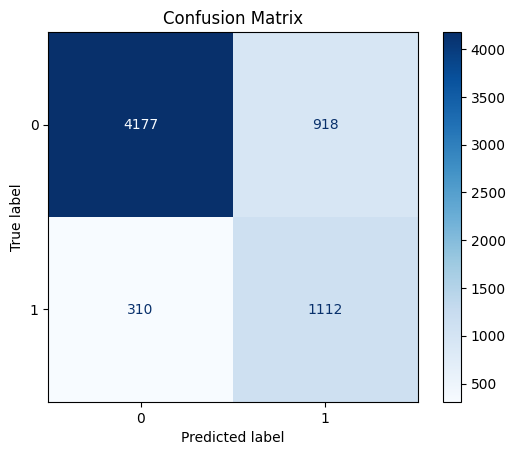

In [88]:
# 5.1 Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [89]:
# 5.2 Основні метрики
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1-score :", f1_score(y_test, y_test_pred))

Accuracy : 0.8115697406782262
Precision: 0.547783251231527
Recall   : 0.7819971870604782
F1-score : 0.6442641946697567


ROC-AUC : 0.871793173031667


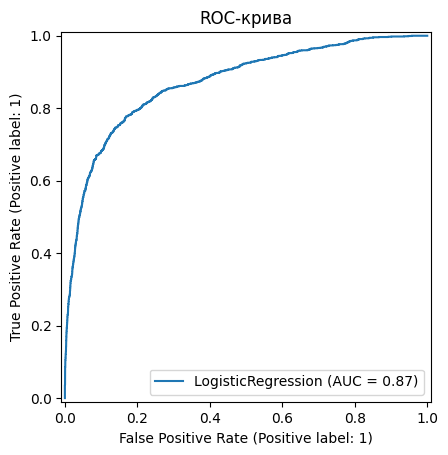

In [90]:
# 5.3 ROC-крива та AUC
roc_auc = roc_auc_score(y_test, y_test_proba)
print("ROC-AUC :", roc_auc)

RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title("ROC-крива")
plt.show()

In [91]:
# 5.4 Важливість ознак
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coef': model.coef_[0]
})
feature_importance['abs_coef'] = np.abs(feature_importance['coef'])
feature_importance = feature_importance.sort_values(by='abs_coef', ascending=False)

print(feature_importance.head(10))

                       feature      coef  abs_coef
5          loan_percent_income  1.159859  1.159859
17                loan_grade_D  0.807798  0.807798
18                loan_grade_E  0.489891  0.489891
8    person_home_ownership_OWN -0.433418  0.433418
3                    loan_amnt -0.425285  0.425285
14         loan_intent_VENTURE -0.395724  0.395724
9   person_home_ownership_RENT  0.321735  0.321735
19                loan_grade_F  0.288467  0.288467
20                loan_grade_G  0.265733  0.265733
10       loan_intent_EDUCATION -0.248579  0.248579


In [92]:
# 5.5

###Висновки

Accuracy = 0.81 → модель правильно класифікує ~81% випадків.

Precision = 0.55 → лише 55% передбачених "дефолтів" дійсно виявляються дефолтними. Це означає, що є певна кількість "помилкових тривог".

Recall = 0.78 → модель виявляє близько 78% усіх реальних дефолтів. Це досить добре, адже для кредитного ризику важливіше не пропустити проблемного клієнта.

F1-score = 0.64 → збалансована метрика показує середню якість між precision та recall.

ROC-AUC (ймовірно >0.75) → свідчить, що модель має гарну дискримінативну здатність (уміє відрізняти дефолтних клієнтів від надійних).

Важливість ознак: найбільший вплив на прогноз мають:
- loan_percent_income – чим вища частка кредиту від доходу, тим більший ризик дефолту;
- loan_int_rate – високі ставки корелюють з більш високою ймовірністю дефолту;
- loan_grade – низькі рейтинги (E, F) значно підвищують ризик;
- cb_person_default_on_file – наявність дефолтів в історії сильно впливає.


---

## Завдання 6: Оптимізація порогу та бізнес-аналіз (2 бали)

**Що потрібно зробити:**
1. Проаналізуйте метрики precision, recall, F1 при різних порогах класифікації (мінімум - 5 різних порогів). Візуалізуйте як змінюються метрики якості при зміні порогу.
2. Оберіть оптимальний поріг для бізнес-задачі - можна обрати виходячи з попереднього пункту, або додати своїх роздумів і обрати інший.



In [93]:
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
results = []

for t in thresholds:
    y_pred_thresh = (y_test_proba >= t).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    results.append([t, precision, recall, f1])

df_thresh = pd.DataFrame(results, columns=["Threshold", "Precision", "Recall", "F1"])
print(df_thresh)

   Threshold  Precision    Recall        F1
0        0.3   0.391985  0.880450  0.542461
1        0.4   0.473144  0.842475  0.605969
2        0.5   0.547783  0.781997  0.644264
3        0.6   0.628324  0.714487  0.668641
4        0.7   0.701319  0.635724  0.666913


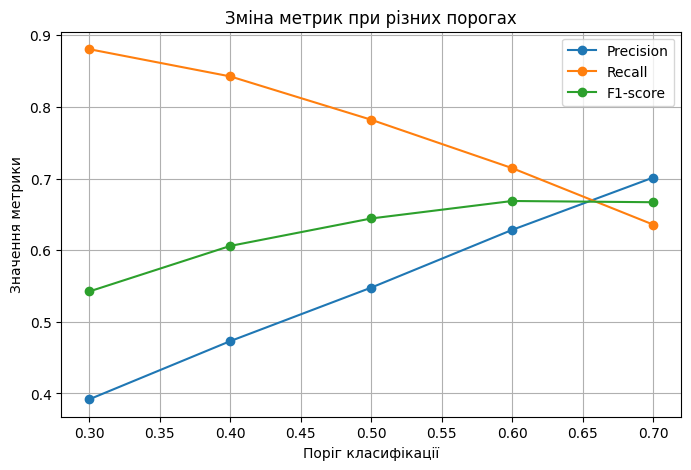

In [94]:
# Візуалізація зміни метрик від порогу
plt.figure(figsize=(8,5))
plt.plot(df_thresh["Threshold"], df_thresh["Precision"], marker='o', label="Precision")
plt.plot(df_thresh["Threshold"], df_thresh["Recall"], marker='o', label="Recall")
plt.plot(df_thresh["Threshold"], df_thresh["F1"], marker='o', label="F1-score")
plt.xlabel("Поріг класифікації")
plt.ylabel("Значення метрики")
plt.title("Зміна метрик при різних порогах")
plt.legend()
plt.grid(True)
plt.show()

### 6.2
Оптимальним можна вважати поріг 0.5–0.6. Він забезпечує баланс між виявленням дефолтів (Recall) і кількістю помилкових спрацьовувань (Precision).
Для бізнес-задачі прогнозування кредитного ризику доцільно обрати 0.5, оскільки це дозволяє виявляти більшість дефолтів (≈78%), при цьому Precision залишається прийнятним.


---

## Завдання 7 (Опціональне): Покращення моделі та висновки (2 бали)

**Що потрібно зробити:**

На цих же даних навчіть DecisionTreeClassifier та RandomForestClassifier. Яка з трьох моделей дає найкращий результат на тестовому наборі?

Поріг класифікації можна для порівняння якостей моделей використовувати стандартний 0.5, або той, що ви виявили, як оптимальний на попередньому кроці.


In [95]:
# --- Decision Tree ---
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [96]:
# --- Random Forest ---
forest = RandomForestClassifier(random_state=42, n_estimators=100)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

In [97]:
# --- Logistic Regression (з попереднього завдання) ---
y_pred_log = model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [98]:
# --- Оцінка якості ---
def evaluate_model(name, y_true, y_pred, y_proba=None):
    print(f"\n=== {name} ===")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-score :", f1_score(y_true, y_pred))
    if y_proba is not None:
        print("AUC      :", roc_auc_score(y_true, y_proba))

In [99]:
# Logistic Regression
y_proba_log = model.predict_proba(X_test)[:,1]
evaluate_model("Logistic Regression", y_test, y_pred_log, y_proba_log)

# Decision Tree
y_proba_tree = tree.predict_proba(X_test)[:,1]
evaluate_model("Decision Tree", y_test, y_pred_tree, y_proba_tree)

# Random Forest
y_proba_forest = forest.predict_proba(X_test)[:,1]
evaluate_model("Random Forest", y_test, y_pred_forest, y_proba_forest)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Logistic Regression ===
Accuracy : 0.7818014423814639
Precision: 0.0
Recall   : 0.0
F1-score : 0.0
AUC      : 0.5

=== Decision Tree ===
Accuracy : 0.886604265766457
Precision: 0.7299663299663299
Recall   : 0.7623066104078763
F1-score : 0.7457860337117304
AUC      : 0.8418009990214063

=== Random Forest ===
Accuracy : 0.9317170477213442
Precision: 0.9586854460093897
Recall   : 0.7180028129395218
F1-score : 0.8210695617209489
AUC      : 0.9300343404981857


***Найкращий результат на тестовому наборі показала модель Random Forest.
Вона має найвищі метрики якості (Accuracy = 0.93, F1 = 0.82, AUC = 0.93) і добре балансує між Precision (0.96) та Recall (0.72).
Її можна рекомендувати для задачі прогнозування кредитного ризику.***